In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(["science", "nature"])

import matplotx
import numpy as np
import pandas as pd

%matplotlib inline

In [41]:
all_res = glob("out/**/*.pkl")

In [42]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    gpr_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["gpr_baseline"]["mean_absolute_error"],
        "max_error": loaded["gpr_baseline"]["max_error"],
        "mse": loaded["gpr_baseline"]["mean_squared_error"],
    }

    compiled_gpr.append(gpr_metrics)

In [43]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [44]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std", "count"]
)

In [45]:
compiled_gpr_grouped = compiled_gpr.groupby(["num_train_points"]).agg(["mean", "std"])

In [46]:
compiled_grouped_res

mae                  max_error  \
                                     mean       std count       mean   
representation num_train_points                                        
SELFIES        10                0.864827  0.237437     3   3.236667   
               20                0.763240  0.111157     2   3.535000   
               50                0.703700  0.039174     2   3.405000   
               100               0.669780  0.003253     2   3.895000   
               200               0.635680       NaN     1   4.570000   
               1000              0.471280       NaN     1   1.720000   
SMILES         10                0.821360  0.111958     5   3.538000   
               20                0.764040  0.063097     4   3.525000   
               50                0.683773  0.057971     6   3.261667   
               100               0.645330  0.017784     4   3.250000   
               200               0.591013  0.005147     3   2.683333   
               1000              0.475280  0.051390     3   2.323333   
               5000              0.494413  0.227155     3  34.320000   

                                                        mse                   
                                       std count       mean        std count  
representation num_train_points                                               
SELFIES        10                 0.357957     3   1.161833   0.576564     3  
               20                 0.912168     2   0.906780   0.193685     2  
               50                 0.558614     2   0.829057   0.089114     2  
               100                0.318198     2   0.767653   0.022024     2  
               200                     NaN     1   0.695634        NaN     1  
               1000                    NaN     1   0.343909        NaN     1  
SMILES         10                 0.363689     5   1.112929   0.257570     5  
               20                 0.586657     4   0.974878   0.157759     4  
               50                 0.850421     6   0.775410   0.116083     6  
               100                0.231373     4   0.686125   0.045116     4  
               200                0.589435     3   0.560134   0.035146     3  
               1000               0.746079     3   0.390088   0.101310     3  
               5000              57.149017     3  13.630741  23.235283     3

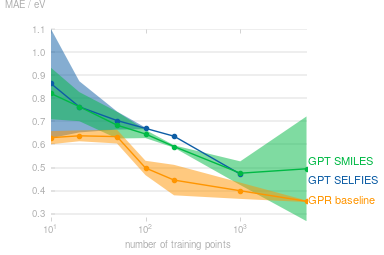

In [47]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1, 1)
    ax.plot(
        compiled_grouped_res.loc["SELFIES", :].index,
        compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"],
        label="GPT SELFIES",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["SELFIES", :].index,
        compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"]
        - compiled_grouped_res.loc["SELFIES", :]["mae"]["std"],
        compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"]
        + compiled_grouped_res.loc["SELFIES", :]["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_grouped_res.loc["SMILES", :].index,
        compiled_grouped_res.loc["SMILES", :]["mae"]["mean"],
        label="GPT SMILES",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["SMILES", :].index,
        compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
        - compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
        compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
        + compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index,
        compiled_gpr_grouped["mae"]["mean"],
        label="GPR baseline",
        marker="o",
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[:].index,
        compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["std"],
        compiled_gpr_grouped.loc[:]["mae"]["mean"] + compiled_gpr_grouped.loc[:]["mae"]["std"],
        alpha=0.5,
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel("number of training points", labelpad=4)
    matplotx.ylabel_top("MAE / eV")
    ax.set_xscale("log")

fig.savefig("bandgap_regression_res.pdf", bbox_inches="tight")